In [51]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

In [15]:
df = pd.read_csv("sales_data.csv", encoding='latin1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
df.drop(["Status", "unnamed1"], axis=1, inplace=True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [23]:
print(df[df['Amount'].isnull()])

     User_ID Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
7    1002092  Shivangi  P00273442      F       55+   61               0   
14   1003858      Cano  P00293742      M     46-50   46               1   
16   1005447       Amy  P00275642      F     46-50   48               1   
109  1005265    Sakshi  P00296242      F     46-50   48               1   
111  1005261   Apoorva  P00057942      F     36-45   41               1   
184  1005538    Kartik  P00269542      F     46-50   49               1   
293  1000326  Jonathan  P00120542      M     51-55   53               0   
344  1002507   Lakshmi  P00045842      F     26-35   35               1   
345  1004498   Srishti  P00030842      F     51-55   55               0   
452  1004601    Gaurav  P00014442      F     36-45   40               1   
464  1004528    Anurag  P00338442      F     26-35   33               1   
493  1002994    Hemant   P0009942      F     36-45   38               0   

              State     

In [24]:
mean_amount = df['Amount'].mean()
df['Amount'].fillna(mean_amount, inplace=True)
print(df.isnull().sum())

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64


In [27]:
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5219.569870
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


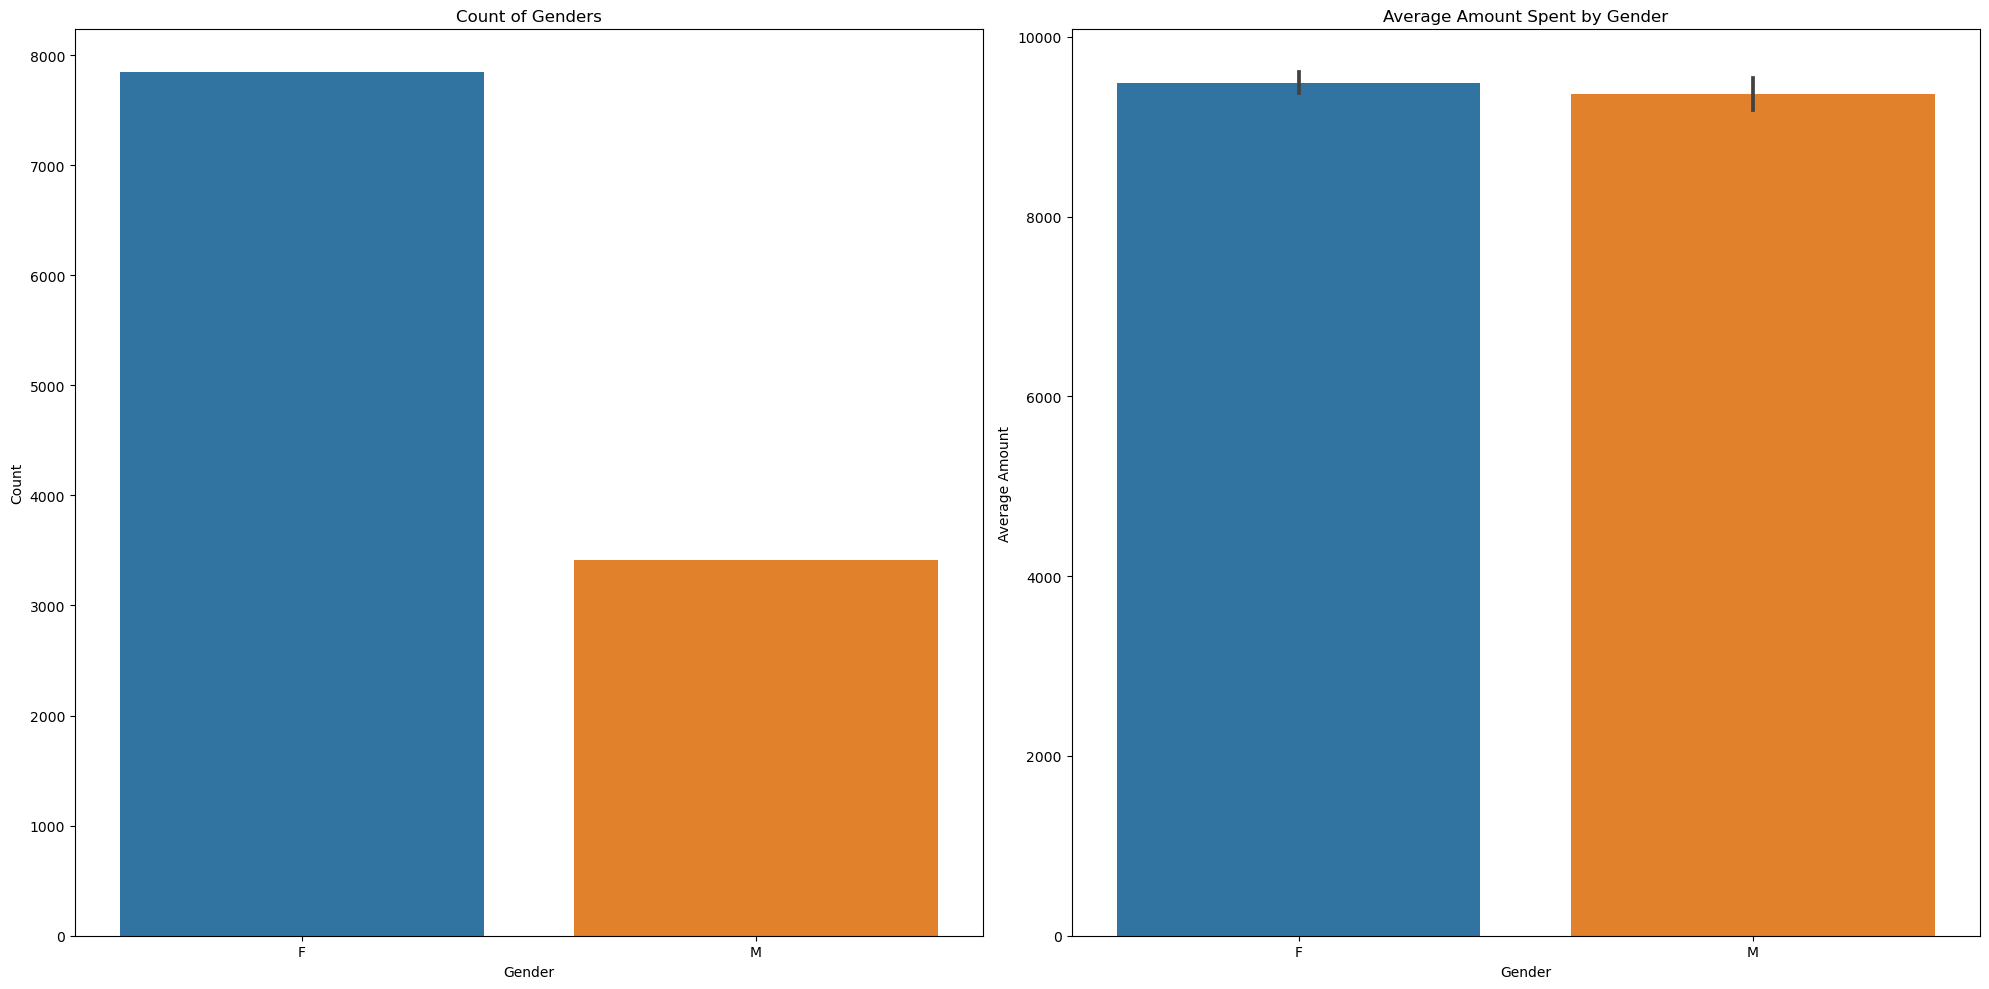

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(data=df, x='Gender', ax=axes[0])
axes[0].set_title('Count of Genders')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.barplot(data=df, x='Gender', y='Amount', estimator=np.mean, ax=axes[1])
axes[1].set_title('Average Amount Spent by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Average Amount')

plt.tight_layout()
plt.show()

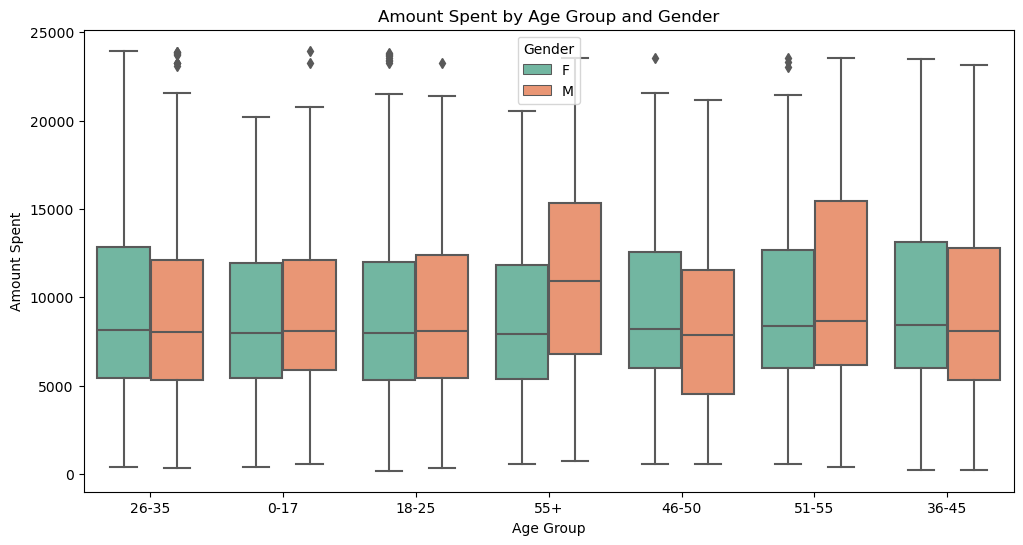

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age Group', y='Amount', hue='Gender', palette='Set2')
plt.title('Amount Spent by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Amount Spent')
plt.legend(title='Gender')
plt.show()

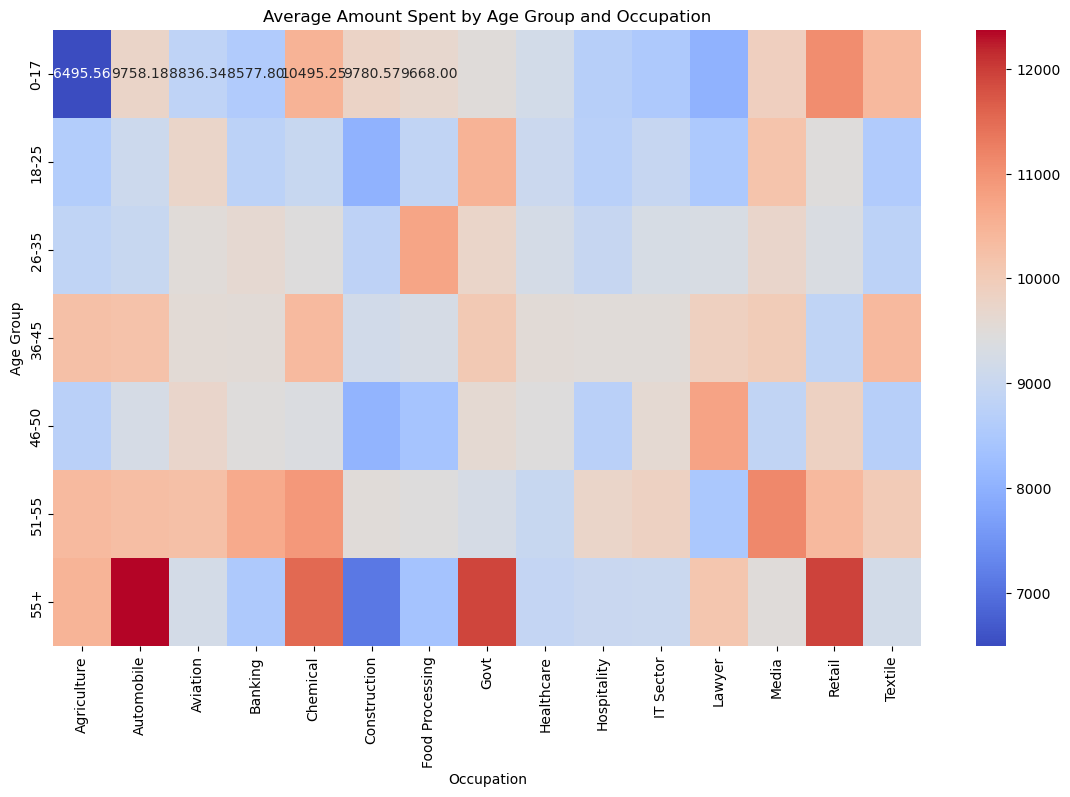

In [42]:
pivot_table = df.pivot_table(values='Amount', index='Age Group', columns='Occupation', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Amount Spent by Age Group and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Age Group')
plt.show()

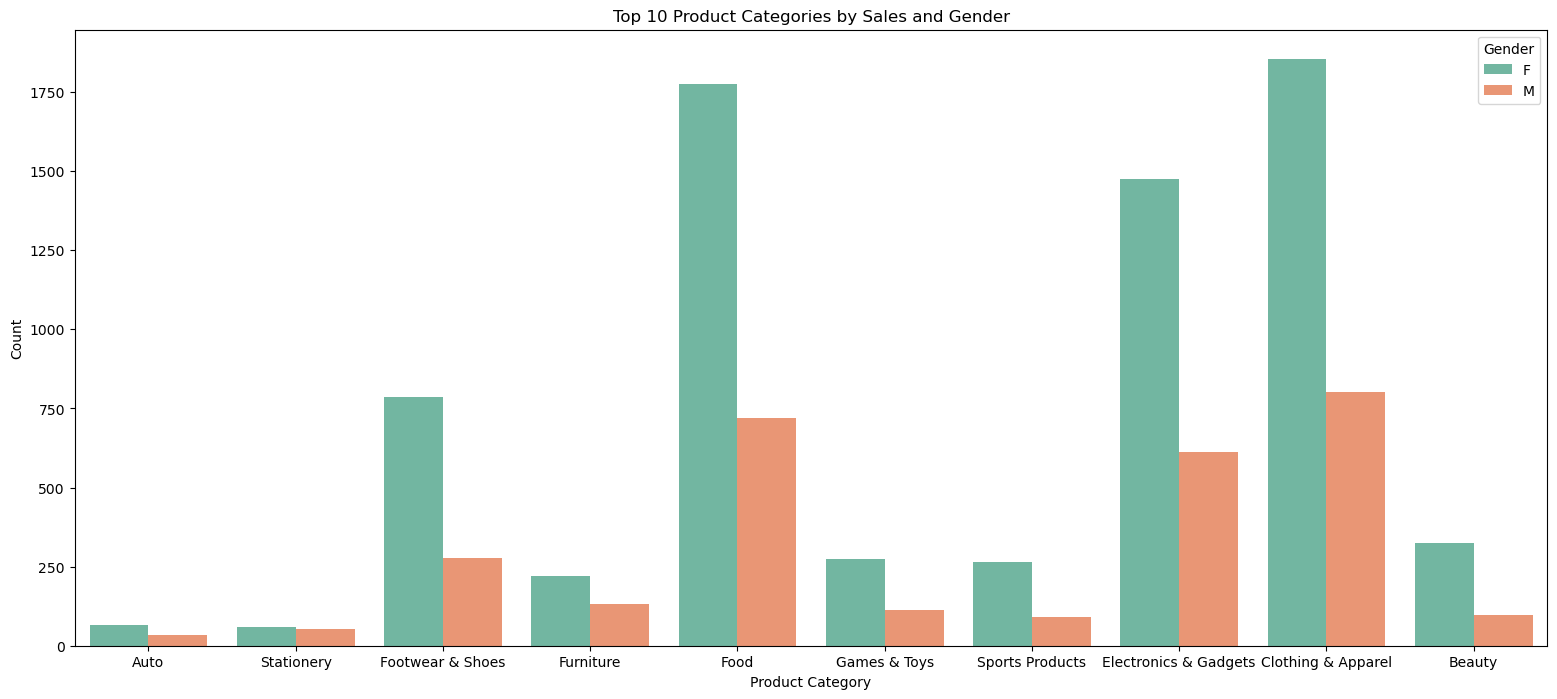

In [49]:
category_sales = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)

top_10_categories = category_sales.head(10).index

df_top_10 = df[df['Product_Category'].isin(top_10_categories)]

plt.figure(figsize=(19, 8))
sns.countplot(data=df_top_10, x='Product_Category', hue='Gender', palette='Set2')
plt.title('Top 10 Product Categories by Sales and Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

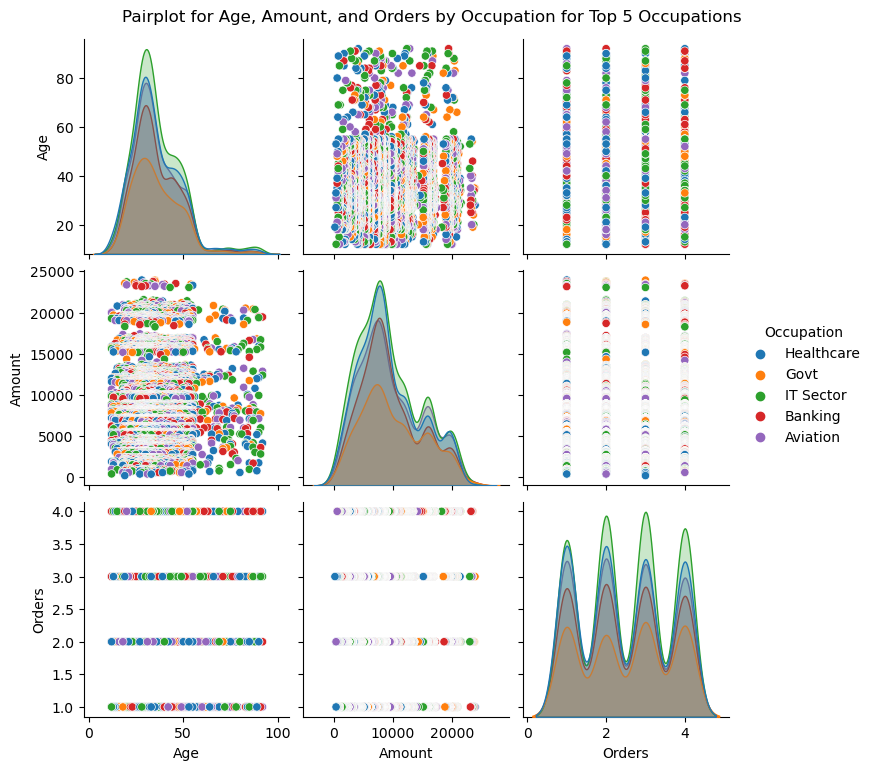

In [58]:
occupation_amount = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)

top_5_occupations = occupation_amount.head(5).index

df_top_5 = df[df['Occupation'].isin(top_5_occupations)]

sns.pairplot(df_top_5, vars=['Age', 'Amount', 'Orders'], hue='Occupation', palette='tab10')
plt.suptitle('Pairplot for Age, Amount, and Orders by Occupation for Top 5 Occupations', y=1.02)
plt.show()

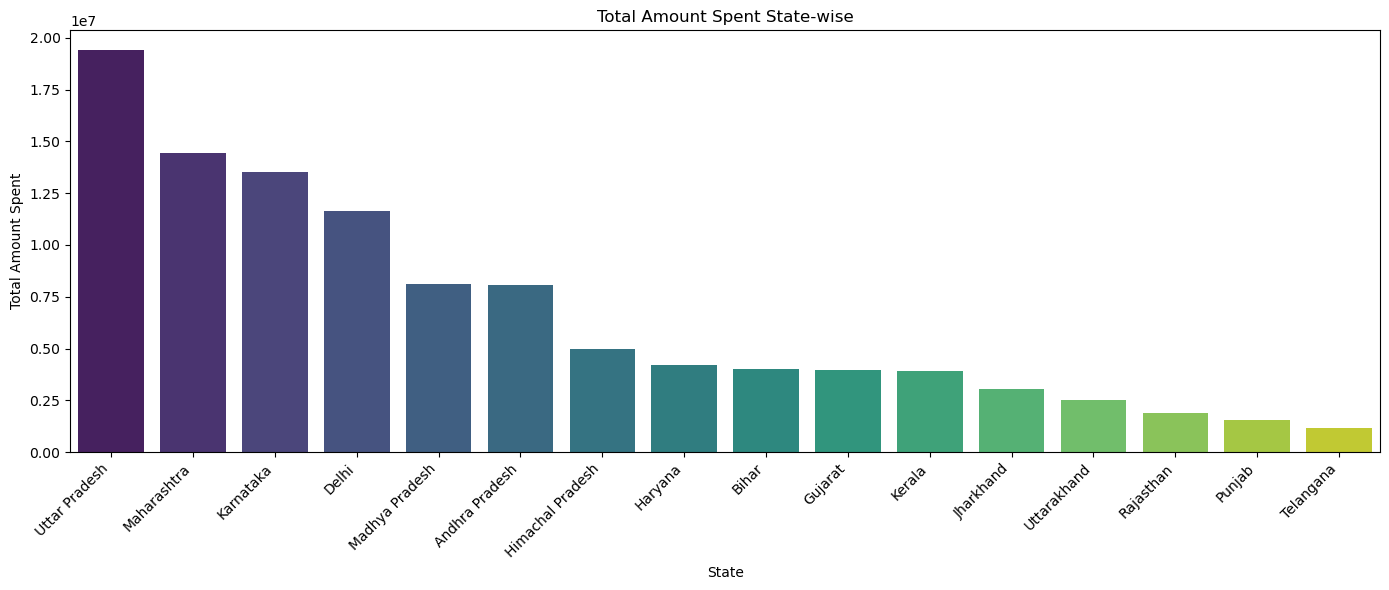

In [61]:
statewise_amount = df.groupby('State')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=statewise_amount.index, y=statewise_amount.values, palette='viridis')
plt.title('Total Amount Spent State-wise')
plt.xlabel('State')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

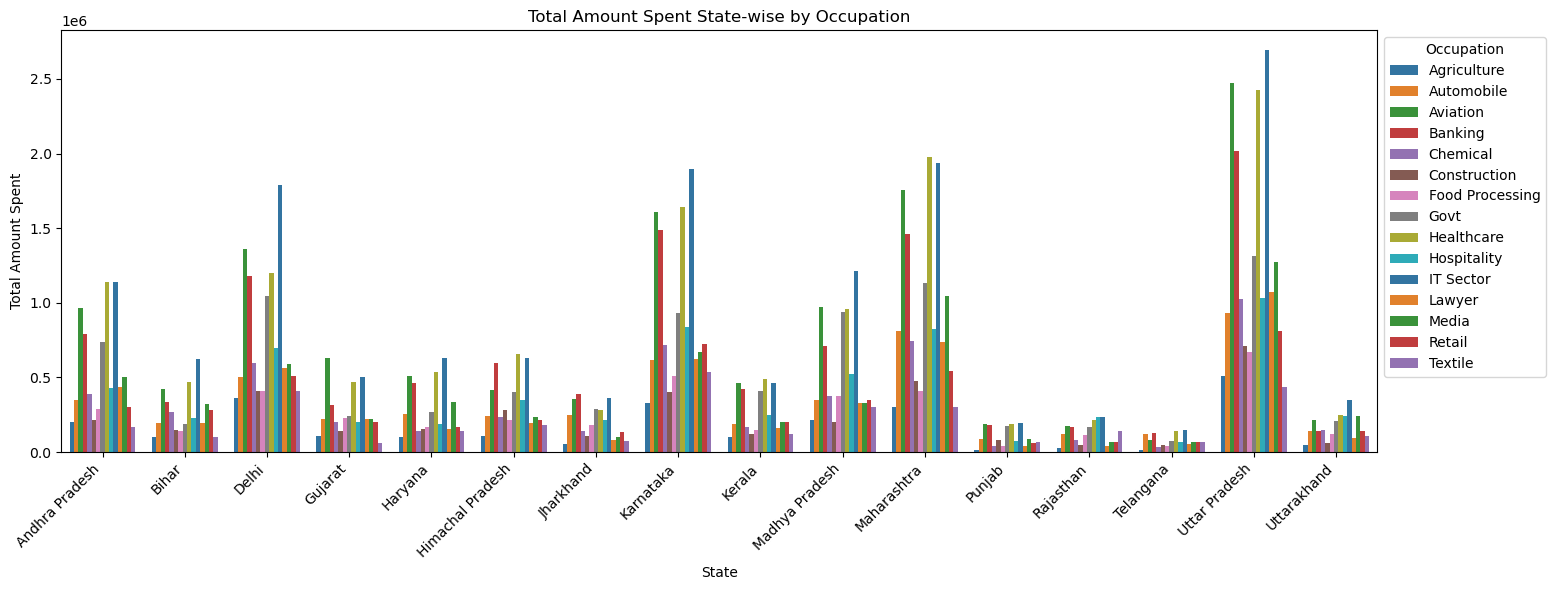

In [69]:
state_occupation_amount = df.groupby(['State', 'Occupation'])['Amount'].sum().reset_index()

# Create a bar plot for state-wise amount spent, with hue representing occupation
plt.figure(figsize=(14, 6))
sns.barplot(data=state_occupation_amount, x='State', y='Amount', hue='Occupation', palette='tab10')
plt.title('Total Amount Spent State-wise by Occupation')
plt.xlabel('State')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Occupation', bbox_to_anchor=(1, 1))
plt.show()